In [2]:
import pandas as pd
import numpy as pn
import sklearn

In [3]:
data = pd.read_excel("houses_for_rent_madrid.xlsx")

In [4]:
data.dtypes

Id                int64
District         object
Address          object
Number           object
Area             object
Rent              int64
Bedrooms        float64
Sq.Mt             int64
Floor           float64
Outer           float64
Elevator        float64
Penthouse         int64
Cottage           int64
Duplex            int64
Semidetached      int64
dtype: object

In [5]:
data.describe(include='all')

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2089.000000,2089,2089,747,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,NaN,20,1336,137,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Salamanca,Piso en Recoletos,1,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,25,29,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1094.026807,NaN,NaN,NaN,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,630.612544,NaN,NaN,NaN,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,1.000000,NaN,NaN,NaN,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,550.000000,NaN,NaN,NaN,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1094.000000,NaN,NaN,NaN,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,NaN,NaN,NaN,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
data.shape

(2089, 15)

## Part 1: Remove columns "Id", "District", "Address", "Number"

In [7]:
data.drop(columns=["Id", "District", "Address", "Number"], inplace = True)

In [8]:
print(data.columns)

Index(['Area', 'Rent', 'Bedrooms', 'Sq.Mt', 'Floor', 'Outer', 'Elevator',
       'Penthouse', 'Cottage', 'Duplex', 'Semidetached'],
      dtype='object')


## Part 2: Imputate missing "Bedrooms", "Floors" and "Sq.Mt"

In [9]:
data['Bedrooms'] = data['Bedrooms'].fillna(data['Bedrooms'].median())
data['Floor'] = data['Floor'].fillna(data['Floor'].median())
data['Sq.Mt'] = data['Sq.Mt'].fillna(data['Sq.Mt'].median())

In [10]:
data.describe(include='all')

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2085,2089.000000,2089.000000,2089.000000,2089.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1932.249402,2.462422,128.919579,24.133078,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,NaN,1495.474485,1.280808,115.745014,941.584658,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
# Check non-missing value counts
print(data[['Bedrooms', 'Floor', 'Sq.Mt']].count())

# Check for remaining NaN values
print(data[['Bedrooms', 'Floor', 'Sq.Mt']].isna().sum())

Bedrooms    2089
Floor       2089
Sq.Mt       2089
dtype: int64
Bedrooms    0
Floor       0
Sq.Mt       0
dtype: int64


## Part 3: Remove all rows with a missing value.
(Note: "Bedrooms", "Floor" and "Area" should not have missing value because of the imputation in the last part).

In [12]:
print("Before dropping NaNs:", data.shape)
data = data.dropna()
print("After dropping NaNs:", data.shape)
data.describe(include='all')

Before dropping NaNs: (2089, 11)
After dropping NaNs: (1917, 11)


,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,1917,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
unique,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1831.937924,2.351069,115.344810,3.577986,0.866980,0.887846,0.085550,0.001565,0.033385,0.001043
std,NaN,1339.740128,1.159676,82.349848,2.998355,0.339685,0.315639,0.279772,0.039539,0.179688,0.032292
min,NaN,450.000000,0.000000,20.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2300.000000,3.000000,136.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


## Part 4: Plot a histogram of Bedrooms, Floor and Sq.Mt

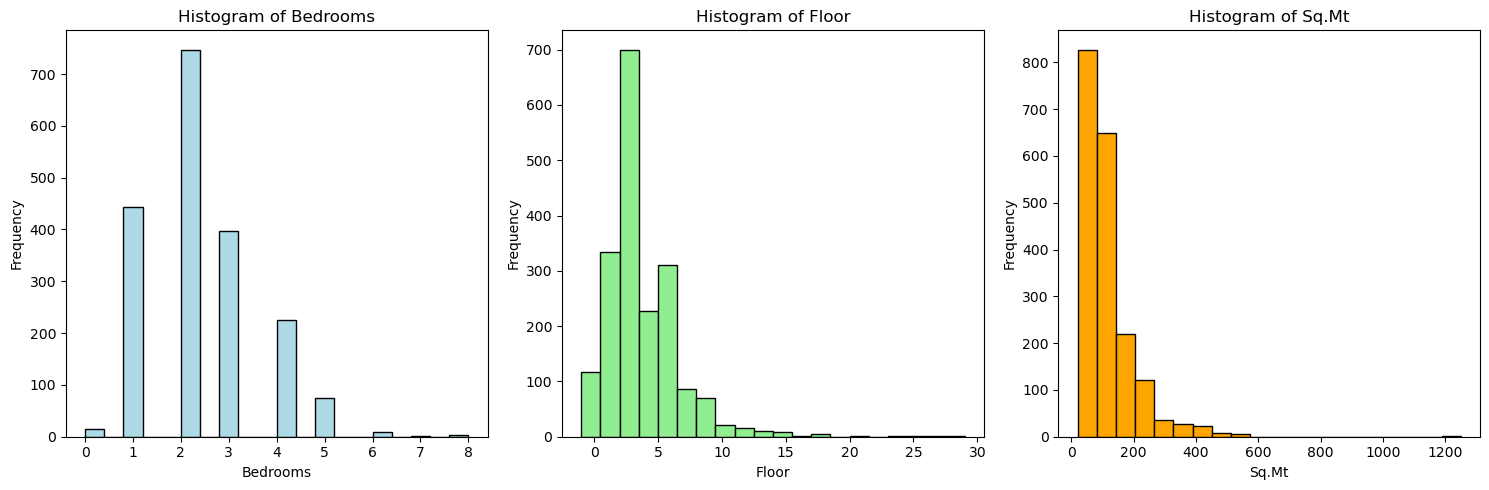

In [13]:
import matplotlib.pyplot as plt

# Plotting histograms
plt.figure(figsize=(15, 5))

# Histogram for Bedrooms
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.hist(data['Bedrooms'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

# Histogram for Floor
plt.subplot(1, 3, 2)  # 2nd subplot
plt.hist(data['Floor'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Floor')
plt.xlabel('Floor')
plt.ylabel('Frequency')

# Histogram for Sq.Mt
plt.subplot(1, 3, 3)  # 3rd subplot
plt.hist(data['Sq.Mt'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Sq.Mt')
plt.xlabel('Sq.Mt')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()


## Part 5:Remove all rows with Floor>20

In [14]:
data = data[data['Floor'] <= 20]

print("After removing floors > 20:", data.shape)

After removing floors > 20: (1910, 11)


## Part 6: Split data to train (70%) and val (15%) and test (15%)


In [16]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.30, random_state=42)

# Now split the temp_data into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=42)

# Check the size of each dataset
print("Training set size (70%):", train_data.shape)
print("Validation set size (15%):", val_data.shape)
print("Test set size (15%):", test_data.shape)

Training set size (70%): (1337, 11)
Validation set size (15%): (286, 11)
Test set size (15%): (287, 11)


## Part 7: Impact encode "Area" with respect to target variable ("Rent"), replacing the original column with the encoded column.

Note that the encoding is computed only using the training set, but must be applied to the val and test set as well.  If the val/test set contain rows with "Area" that was not observed in the training, then the encoding cannot be computed for those rows, and they should be removed.

In [17]:
#Computing Impact encoding on Training set (70%)
area_rent_means = train_data.groupby('Area')['Rent'].mean()

#Applying Encoding to Training, Validation, and Test Sets:
train_data['Area'] = train_data['Area'].map(area_rent_means)
val_data['Area'] = val_data['Area'].map(area_rent_means)
test_data['Area'] = test_data['Area'].map(area_rent_means)

#Removing Rows with NaN in Encoded Column in Validation and Test Sets:
val_data = val_data.dropna(subset=['Area'])
test_data = test_data.dropna(subset=['Area'])

#Cheking the output
print("Training set size:", train_data.shape)
print("Validation set size:", val_data.shape)
print("Test set size:", test_data.shape)

Training set size: (1337, 11)
Validation set size: (282, 11)
Test set size: (281, 11)
